<a href="https://colab.research.google.com/github/sanairac/Causal-effect/blob/master/3_2_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
#pip install yfinance

In [107]:
#pip install yfinance==0.2.47

In [108]:
import yfinance as yf
import pandas as pd

In [109]:
ticker = 'TQQQ'

data = yf.download(ticker, start = "2024-01-01",
                   end = '2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [110]:
df = pd.DataFrame(data)
df

Price,Close,High,Low,Open,Volume
Ticker,TQQQ,TQQQ,TQQQ,TQQQ,TQQQ
Date,,,,,
2024-01-02,47.463169,48.745157,46.615084,48.666264,88135300
2024-01-03,45.944500,46.881339,45.786717,46.516462,83906100
2024-01-04,45.175312,46.319240,45.096419,45.234478,71867700
2024-01-05,45.342957,46.269932,44.840024,45.224620,85039900
2024-01-08,48.074577,48.222501,45.688108,45.747274,67687100
...,...,...,...,...,...
2024-12-24,88.440002,88.480003,85.639999,85.949997,24069800
2024-12-26,88.250000,89.080002,86.589996,87.620003,29531000


In [111]:
#adjust close - accounts for stock splits and stock repurchases
# display first few rows of dataset

In [112]:
print(data.head())    ## oppposite of .head() is .tail()

Price           Close       High        Low       Open    Volume
Ticker           TQQQ       TQQQ       TQQQ       TQQQ      TQQQ
Date                                                            
2024-01-02  47.463169  48.745157  46.615084  48.666264  88135300
2024-01-03  45.944500  46.881339  45.786717  46.516462  83906100
2024-01-04  45.175312  46.319240  45.096419  45.234478  71867700
2024-01-05  45.342957  46.269932  44.840024  45.224620  85039900
2024-01-08  48.074577  48.222501  45.688108  45.747274  67687100


In [113]:
#import a submodule from a larger library

In [114]:
import matplotlib.pyplot as plt

In [115]:
data['Returns'] = data['Close'].pct_change()

In [116]:
data['Cumulative Returns'] = (1+data['Returns']).cumprod()-1
#### we are looking at Yahoo Finance Close Column and find %age
#### change between each data in the set
#### so we can see how returns are aggregated over time.
#### At the end subtract the one dollar so we can see the percentage change

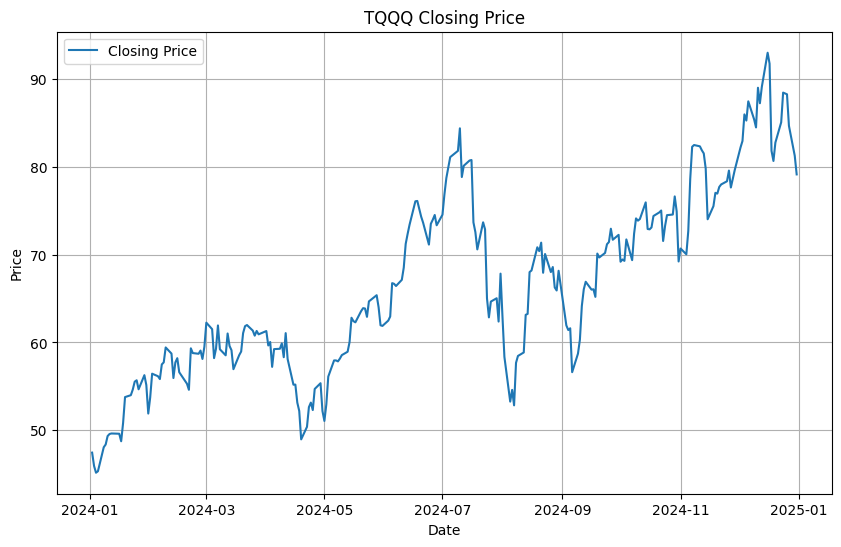

In [117]:
plt.figure(figsize = (10,6))
plt.plot(data.index, data['Close'], label = 'Closing Price')
plt.xlabel('Date') #time values should be the first parameter following plt.plot()
plt.ylabel('Price')
plt.title(f'{ticker} Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
average_daily_return = data['Returns'].mean()

In [119]:
# Calculate annualized return (assuming 252 trading days per year)
annualized_return = (1 + average_daily_return) **252 -1 # (1+avg r)^252

In [120]:
print(annualized_return)

0.928957106036634


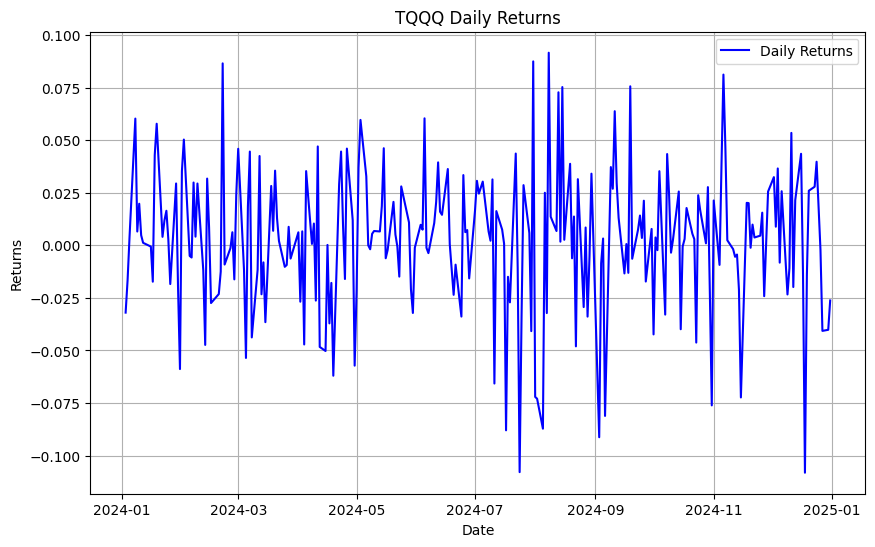

In [121]:
plt.figure(figsize = (10,6))
plt.plot(data.index, data['Returns'], label = 'Daily Returns',
        color = 'blue')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title(f'{ticker} Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
#pip install plotly

In [123]:
import plotly.graph_objects as go
import plotly.io as pio

In [124]:
##  pio.renderers.default = 'browser' ### needed for Spyder to produce ploty visual in browser

In [125]:
plt.figure(figsize = (10,6))
fig = go.Figure(data = [go.Candlestick(x = data.index,
                                       open = data['Open'],
                                       high = data['High'],
                                       low = data['Low'],
                                       close = data['Close'])])

fig.update_layout(title = f'{ticker} Candlestick Chart',
                  xaxis_title = 'Date',
                  yaxis_title = 'Price',
                  xaxis_rangeslider_visible = False)
fig.show()

<Figure size 1000x600 with 0 Axes>

In [126]:
### if the vix is massive you find that the stock is volatile
### volatile stock means there is an opportunity to trade with options